In [11]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files
import pandas as pd
import json
from matplotlib.pyplot import cm
import numpy as np
import csv
from shapely.geometry import Polygon
from shapely.ops import cascaded_union

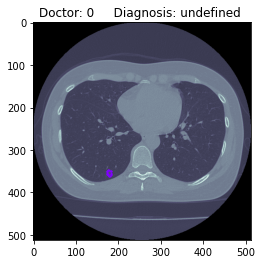

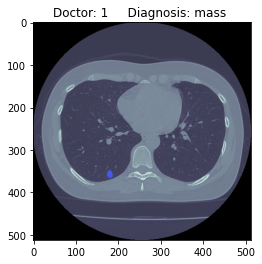

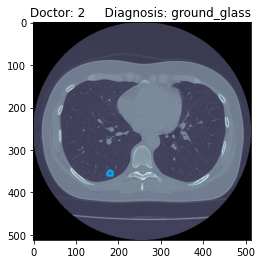

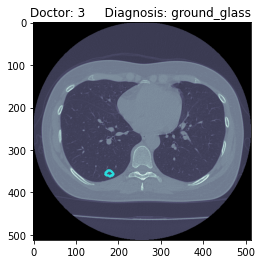

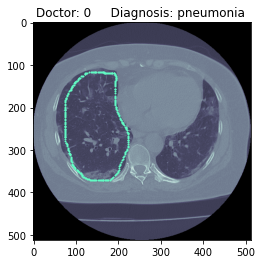

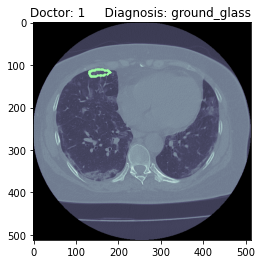

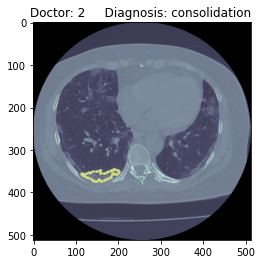

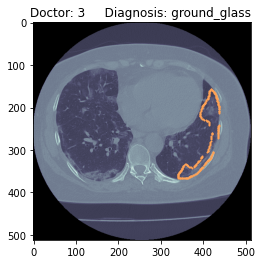

In [72]:
data = pd.read_csv("Task1/test.csv")
color=iter(cm.rainbow(np.linspace(0,1,10)))
label_coordinate=[]
for x in range(8):
    c = next(color)
    doc=data['doc_name'][x]
    subject=data['path'][x]
    each_markup=json.loads(data['ohif_markup'][x]);
    each_ohifMarks=each_markup['ohifMarks']
    handles=each_ohifMarks[0]['handles']
    dataset = pydicom.dcmread('Task1/'+subject)
    if 'location' in each_ohifMarks[0]:
        plt.figure()
        plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
        label=each_ohifMarks[0]['location']
        coordinates=[];
        # plot the image using matplotlib
        for i in range(len(handles['points'])):
            coordinatex=handles['points'][i]['x']
            coordinatey=handles['points'][i]['y']
            coordinates.append((coordinatex,coordinatey))
            plt.plot(coordinatex, coordinatey,'o', c=c, markersize=1) 
        plt.title('Doctor: {}    '.format(doc)+' Diagnosis: {} '.format(label))
        plt.savefig('Task1/Doctor{}'.format(doc)+'Diagnosis{}'.format(label)+'.png')
    else:
        label='undefined'
        coordinates = [];
        plt.figure()
        plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
        # plot the image using matplotlib
        for i in range(len(handles['points'])):
            coordinatex = handles['points'][i]['x']
            coordinatey = handles['points'][i]['y']
            coordinates.append((coordinatex,coordinatey))
            plt.plot(coordinatex, coordinatey, 'o', c=c, markersize=1)  # og:shorthand for green circle
        plt.title('Doctor: {}    '.format(doc)+' Diagnosis: {} '.format(label))
        plt.savefig('Task1/Doctor{}'.format(doc)+'Diagnosis{}'.format(label)+'.png')
    label_coordinate.append(coordinates)
    


In [85]:
p=Polygon(label_coordinate[2])
q=Polygon(label_coordinate[3])
polygons = [p, q]
u = cascaded_union(polygons)
iou=p.intersection(q).area/u.area
print('IOU of ground glass diagnosed by the second and third doctors in the first subject: {} '.format(iou))

IOU of ground glass diagnosed by the second and third doctors in the first subject: 0.6554768280805268 


Since it is desired for the IOU metric to be above 0.5, the derived value passes this requirement.

In [86]:
p=Polygon(label_coordinate[5])
q=Polygon(label_coordinate[7])
polygons = [p, q]
u = cascaded_union(polygons)
iou=p.intersection(q).area/u.area
print('IOU of ground glass diagnosed by the first and third doctors in the second subject: {} '.format(iou))

IOU of ground glass diagnosed by the first and third doctors in the second subject: 0.0 


In this case, we can see from the images also, that the regions are not overlapping and located even in different lungs.